>>Bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

>>Dataset

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


>>Transformação

In [ ]:
df_dummies = pd.get_dummies(df, columns=['Gender'], prefix='Gender', drop_first=False).astype(int)
df = pd.concat([df, df_dummies], axis=1)
df = df.loc[:, ~df.columns.duplicated()]

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,1
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,1,0


>> Selecionando as colunas de interesse para clusterização

In [ ]:
X = df[['Age', 'Annual Income (k$)', 'Gender_Female','Gender_Male']]

>> Normalização e PCA

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
print("Variância explicada por cada componente:", pca.explained_variance_ratio_)
print("Variância total explicada:", np.sum(pca.explained_variance_ratio_))

Variância explicada por cada componente: [0.50335688 0.25309629]
Variância total explicada: 0.7564531728086981


>> Número ideal de clusteres - Curva do Cotovelo

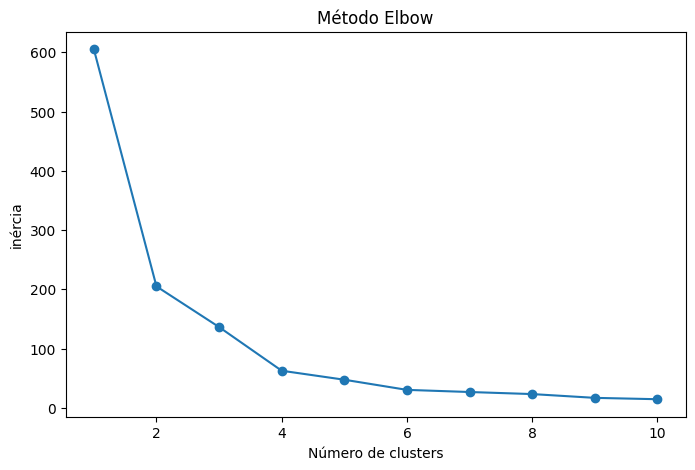

In [ ]:
inércia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_pca)
    inércia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inércia, marker='o', linestyle='-')
plt.title('Método Elbow')
plt.xlabel('Número de clusters')
plt.ylabel('inércia')
plt.show()

>> Clusterização  (Agrupamento)

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_pca)

In [ ]:
df['Cluster'] = clusters

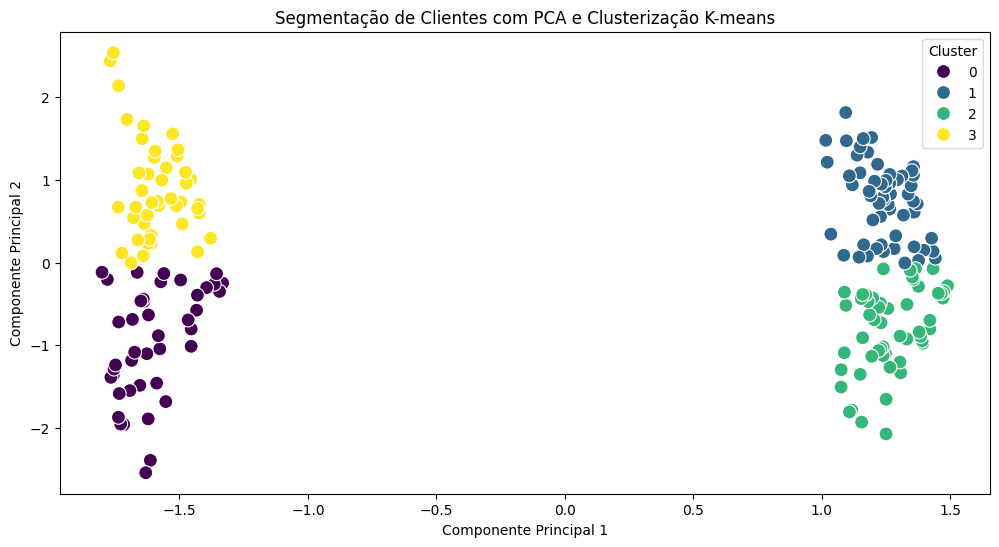

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis', s=100, marker='o')
plt.title('Segmentação de Clientes com PCA e Clusterização K-means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()

>>**Aplicação ( *Visão de Negócio*... )**



In [ ]:
import matplotlib.pyplot as plt

def exibir_histograma_renda_cluster(df, cluster_numero):
    clientes_cluster = df[df['Cluster'] == cluster_numero]

    if clientes_cluster.empty:
        print(f"Nenhum cliente encontrado no cluster {cluster_numero}.")
    else:
        plt.figure(figsize=(10, 6))
        plt.hist(clientes_cluster['Gender'], bins=10, color='skyblue', edgecolor='black')
        plt.title(f'Histograma do Genero para Clientes do Cluster {cluster_numero}')
        plt.xlabel('Genero')
        plt.ylabel('Frequência')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

Digite o número do cluster para visualizar o histograma da renda: 3


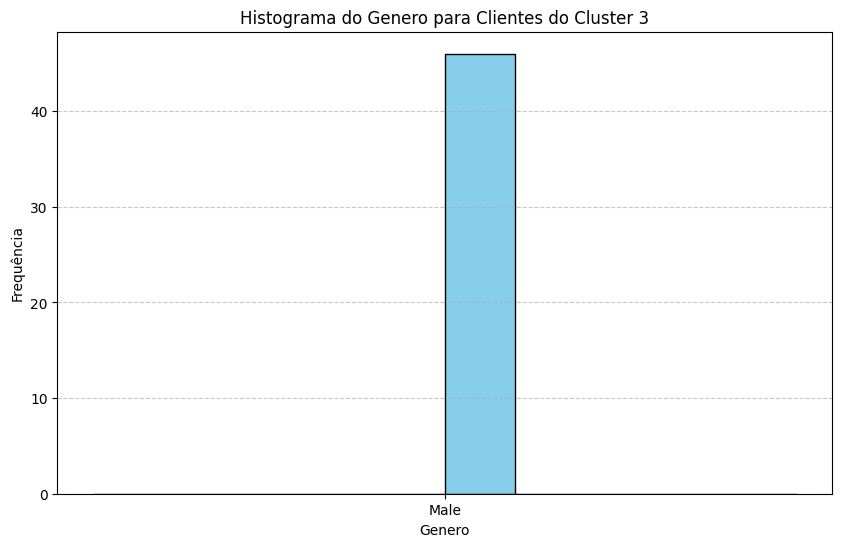

In [ ]:
cluster_desejado = int(input("Digite o número do cluster para visualizar o histograma da renda: "))
exibir_histograma_renda_cluster(df, cluster_desejado)

In [ ]:
def exibir_clientes_por_cluster(df, cluster_numero):

    clientes_cluster = df[df['Cluster'] == cluster_numero]

    if clientes_cluster.empty:
        print(f"Nenhum cliente encontrado no cluster {cluster_numero}.")
    else:
        print(f"Exibindo dados para clientes do Cluster {cluster_numero}:")
        display(clientes_cluster[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']])

In [ ]:
cluster_desejado = int(input("Digite o número do cluster que deseja visualizar: "))
exibir_clientes_por_cluster(df, cluster_desejado)

Digite o número do cluster que deseja visualizar: 3
Exibindo dados para clientes do Cluster 3:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
33,34,Male,18,33,92,3
41,42,Male,24,38,92,3
61,62,Male,19,46,55,3
65,66,Male,18,48,59,3
68,69,Male,19,48,59,3
75,76,Male,26,54,54,3
91,92,Male,18,59,41,3
95,96,Male,24,60,52,3
99,100,Male,20,61,49,3
103,104,Male,26,62,55,3


>>>Função para calcular a renda média dos clientes em um cluster específico


In [ ]:
def calcular_media_renda_cluster(df, cluster_numero):

    clientes_cluster = df[df['Cluster'] == cluster_numero]

    if clientes_cluster.empty:
        print(f"Nenhum cliente encontrado no cluster {cluster_numero}.")
        return None
    else:
        media_renda = clientes_cluster['Annual Income (k$)'].mean()
        print(f"A renda média dos clientes no Cluster {cluster_numero} é: ${media_renda:.2f} mil")


In [ ]:
cluster_desejado = int(input("Digite o número do cluster para calcular a renda média: "))
calcular_media_renda_cluster(df, cluster_desejado)

Digite o número do cluster para calcular a renda média: 0
A renda média dos clientes no Cluster 0 é: $44.95 mil


>>>Função para calcular o Spending Score médio dos clientes em um cluster específico

In [ ]:
def calcular_media_spending_score_cluster(df, cluster_numero):

    clientes_cluster = df[df['Cluster'] == cluster_numero]

    if clientes_cluster.empty:
        print(f"Nenhum cliente encontrado no cluster {cluster_numero}.")
        return None
    else:
        media_spending_score = clientes_cluster['Spending Score (1-100)'].mean()
        print(f"O Spending Score médio dos clientes no Cluster {cluster_numero} é: {media_spending_score:.2f}")

In [ ]:
cluster_desejado = int(input("Digite o número do cluster para calcular o Spending Score médio: "))
calcular_media_spending_score_cluster(df, cluster_desejado)

Digite o número do cluster para calcular o Spending Score médio: 2
O Spending Score médio dos clientes no Cluster 2 é: 47.02
